In [3]:
import pandas as pd
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_json = json.loads(open("./PennFudanPed/PennFudanPed_train.json",'r').read())
val_json = json.loads(open("./PennFudanPed/PennFudanPed_val.json",'r').read())

In [5]:
df1 = pd.json_normalize(train_json["annotations"])
df1

,area,iscrowd,bbox,category_id,image_id,id,ignore,segmentation
0,35947,0,"[66.0, 60.0, 103.0, 349.0]",1,0,0,0,[]
1,28812,0,"[154.0, 90.0, 98.0, 294.0]",1,0,1,0,[]
2,28809,0,"[227.0, 93.0, 97.0, 297.0]",1,0,2,0,[]
3,28710,0,"[416.0, 100.0, 99.0, 290.0]",1,0,3,0,[]
4,39615,0,"[594.0, 111.0, 139.0, 285.0]",1,0,4,0,[]
...,...,...,...,...,...,...,...,...
278,28595,0,"[146.0, 83.0, 95.0, 301.0]",1,118,278,0,[]
279,24871,0,"[233.0, 69.0, 77.0, 323.0]",1,118,279,0,[]
280,23144,0,"[341.0, 87.0, 88.0, 263.0]",1,118,280,0,[]
281,6375,0,"[12.0, 57.0, 51.0, 125.0]",1,118,281,0,[]


In [5]:
# np.bincount(list(df1['image_id']))

In [6]:
# f = open('.\\PennFudanPed\\PennFudanPed_full.json',)
# data = json.load(f)
# df = pd.json_normalize(data['images'])
# df

In [11]:
#patch_size = 64,128
#avg image size = 300,400
def create_positive_samples(train_json, pos_dir, root_dir = './'):
    if(os.path.exists(pos_dir)==False):
        os.mkdir(pos_dir)
    data = json.load(open(train_json,))
    
    annotations = pd.json_normalize(data['annotations'])
    images = pd.json_normalize(data['images'])
    
    for image in list(images['file_name']):
        img_path = os.path.join(root_dir, image)
        image_id = int(image[-7:-4])
        
        bboxes = list(annotations.loc[annotations['image_id'] == image_id]['bbox'])
        
        patches = get_patches(img_path, bboxes, patch_size)

In [12]:
def get_patches(img_path, bboxes, patch_size=(64,128)):
    img = cv2.imread(img_path)
    patches = []
    for bb in bboxes:
        patch = get_patch(img, bb)
        patch = cv2.resize(patch, patch_size)
        patches.append()
    return patches

In [13]:
def get_patch(image, bb, gray = False):
    x, y, w, h = int(bb[0]), int(bb[1]), int(bb[2]), int(bb[3]) # w is along x (right), h is along y (down)
    return image[y:y+h+1, x:x+w+1] if gray == True else image[y:y+h+1, x:x+w+1, :]

In [14]:
img = cv2.imread('PennFudanPed/PNGImages/PennPed00004.png')
bboxes = list(df1.loc[df1['image_id'] == 0]['bbox'])

In [15]:
bboxes

[[20.0, 57.0, 90.0, 265.0],
 [317.0, 21.0, 102.0, 297.0],
 [420.0, 61.0, 20.0, 57.0]]

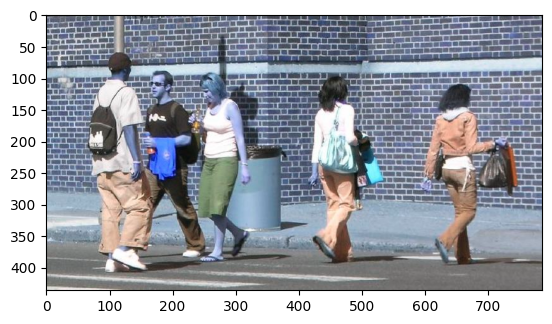

In [16]:
plt.imshow(img)
plt.show()

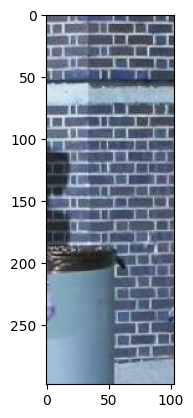

In [19]:
patch = get_patch(img, bboxes[1])
plt.imshow(patch)
plt.show()

In [1]:
import cv2
from skimage.feature import hog

In [2]:
img = cv2.imread('/Users/shubhammittal/Desktop/CV-A3/PennFudanPed/PNGImages/FudanPed00001.png')

In [4]:
img.shape

(536, 559, 3)

In [5]:
out = hog(img,
    orientations=9, pixels_per_cell=(8, 8), 
    cells_per_block=(3, 3), block_norm='L2-Hys', 
    visualize=True, transform_sqrt=False, 
    feature_vector=True, multichannel=True
   )

In [6]:
len(out)

2

In [8]:
out[0].shape

(352755,)

In [9]:
out[1].shape

(536, 559)

In [10]:
import matplotlib.pyplot as plt

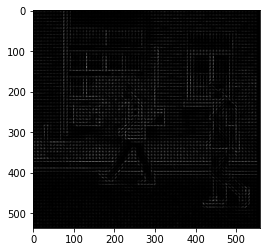

In [11]:
plt.imshow(out[1], cmap='gray')
plt.show()

# Pretrained HOG Detector

In [67]:
# https://debuggercafe.com/opencv-hog-hyperparameter-tuning-for-accurate-and-fast-person-detection/

In [49]:
import pandas as pd
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [122]:
# def draw_rectangles(image, bboxes):
#     rects = bboxes[0]
#     weights = bboxes[1]
#     for i, (x, y, w, h) in enumerate(rects):
#         if weights[i] < 0.13:
#             continue
#         elif weights[i] < 0.3 and weights[i] > 0.13:
#             cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
#         if weights[i] < 0.7 and weights[i] > 0.3:
#             cv2.rectangle(image, (x, y), (x+w, y+h), (50, 122, 255), 2)
#         if weights[i] > 0.7:
#             cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
#     cv2.putText(image, 'High confidence', (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
#     cv2.putText(image, 'Moderate confidence', (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (50, 122, 255), 2)
#     cv2.putText(image, 'Low confidence', (10, 55), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
#     return image

In [123]:
hog = cv2.HOGDescriptor()
# hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [124]:
hog.setSVMDetector(hog.getDefaultPeopleDetector())

In [146]:
img = cv2.imread('PennFudanPed/PNGImages/FudanPed00018.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [148]:
bboxes, scores = hog.detectMultiScale(img) # , winStride=(2, 2), padding=(10, 10), scale=1.02)

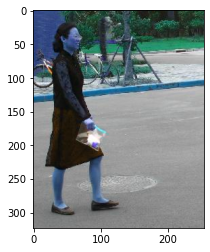

In [149]:
plt.imshow(img)

In [151]:
bboxes

()

In [127]:
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in bboxes])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

In [128]:
pick

array([[613, 216, 716, 423],
       [402, 161, 533, 423],
       [ 58, 246, 141, 412],
       [192,  73, 361, 411],
       [ 79,  74, 176, 267]])

In [129]:
scores[(pick[0] == rects).mean(axis=1) == 1]

array([[0.57365357]])

In [65]:
img = draw_rectangles(img, hog.detectMultiScale(img))

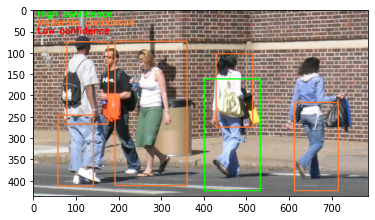

In [66]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img) # , cmap='gray')
plt.show()

In [69]:
from imutils.object_detection import non_max_suppression

In [142]:
def draw_rectangles(img, bboxes, scores):
    for idx, (x, y, w, h) in enumerate(bboxes):
        cv2.rectange(img, (x,y), (x+w,y+h), (0,255,0), 2)
    return img

def do_NMS(bboxes, scores):
    # changes x,y,w,h to x,y,x2,y2
    for idx in range(bboxes.shape[0]):
        bboxes[idx, 2] += bboxes[idx, 0]
        bboxes[idx, 3] += bboxes[idx, 1]
    
    bboxes_nms = non_max_suppression(bboxes, probs=None, overlapThresh=0.65)
    
    # get scores for these bounding boxes
    scores_nms = []
    for bb in bboxes_nms:
        scores_nms.append(scores[(bb == bboxes).mean(axis=1) == 1][0,0])
    scores_nms = np.array(scores_nms).reshape(-1,1)

    # changes x,y,x2,y2 to x,y,w,h
    for idx in range(bboxes_nms.shape[0]):
        bboxes_nms[idx, 2] = bboxes_nms[idx, 2] - bboxes_nms[idx, 0] + 1
        bboxes_nms[idx, 3] = bboxes_nms[idx, 3] - bboxes_nms[idx, 1] + 1

    return bboxes_nms, scores_nms



In [145]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(hog.getDefaultPeopleDetector())

# predictions will be saved iteratively
predictions = []

# read the images using the file name in the json file
test_json = json.loads(open("./PennFudanPed/PennFudanPed_val.json",'r').read())
img_dicts = test_json['images']
for img_dict in img_dicts:
    img = cv2.imread(os.path.join("./", img_dict['file_name']))
    img_id = img_dict['id']

    # predict the bboxes using pretrained HoG
    bboxes, scores = hog.detectMultiScale(img)

    print(img_dict['file_name'])
    # do NMS and append the predictions in COCO format
    bboxes, scores = do_NMS(bboxes, scores)

    for bb, score in zip(bboxes, scores):
        pred = {}
        pred["image_id"] = img_id
        pred["score"] = score[0]
        pred["category_id"] = 1
        pred["bbox"] = bb
        predictions.append(pred)


PennFudanPed/PNGImages/PennPed00046.png
PennFudanPed/PNGImages/PennPed00055.png
PennFudanPed/PNGImages/PennPed00031.png
PennFudanPed/PNGImages/FudanPed00034.png
PennFudanPed/PNGImages/PennPed00001.png
PennFudanPed/PNGImages/PennPed00041.png
PennFudanPed/PNGImages/FudanPed00040.png
PennFudanPed/PNGImages/PennPed00052.png
PennFudanPed/PNGImages/PennPed00076.png
PennFudanPed/PNGImages/PennPed00014.png
PennFudanPed/PNGImages/PennPed00009.png
PennFudanPed/PNGImages/FudanPed00018.png


AttributeError: 'tuple' object has no attribute 'shape'

In [152]:
a = [{"he":1}, {"he":2}]

In [154]:
with open("output.json", "w") as f:
    json.dump(a, f)

In [155]:
json.loads(open("output.json", "r").read())

[{'he': 1}, {'he': 2}]

In [3]:
def print_even(test_list) :
    for i in test_list:
        if i % 2 == 0:
            yield i
 
# initializing list
test_list = [1, 4, 5, 6, 7]

for j in print_even(test_list):
    print (j)


4
6


In [ ]:
from skimage.transform import pyramid_gaussian
from skimage.io import imread
from skimage.feature import hog
from sklearn.externals import joblib
import cv2
import argparse as ap
import imutils
import numpy as np
import ntpath
from nms import nms
from config import *

def sliding_window(image, window_size, step_size):
    for y in xrange(0, image.shape[0], step_size[1]):
        for x in xrange(0, image.shape[1], step_size[0]):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

def pyramid(image, scale, minSize):
    # yield the original image
    yield image
    while True:
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
        yield image

if __name__ == "__main__":
    # Parse the command line arguments
    parser = ap.ArgumentParser()
    parser.add_argument('-i', "--image", help="Path to the test image", required=True)
    parser.add_argument('-d','--downscale', help="Downscale ratio", default=1.25,
            type=float)
    parser.add_argument('-v', '--visualize', help="Visualize the sliding window",
            action="store_true")
    args = vars(parser.parse_args())

    # Read the image
    im = imread(args["image"], as_grey=True)
    #min_wdw_sz = (40, 40)
    #step_size = (8, 8)
    downscale = args['downscale']
    visualize_det = args['visualize']

    # Load the classifier
    clf = joblib.load(model_path)

    # List to store the detections
    detections = []
    # The current scale of the image
    scale = 0
    # Downscale the image and iterate
    for im_scaled in pyramid(image=im, scale=downscale, minSize=min_wdw_sz):
        # This list contains detections at the current scale
        cd = []
        if im_scaled.shape[0] < min_wdw_sz[1] or im_scaled.shape[1] < min_wdw_sz[0]:
            break
        for (x, y, im_window) in sliding_window(im_scaled, min_wdw_sz, step_size):
            if im_window.shape[0] != min_wdw_sz[1] or im_window.shape[1] != min_wdw_sz[0]:
                continue
            # Calculate the HOG features
            fd = hog(im_window, orientations, pixels_per_cell, cells_per_block, visualize, normalize)
            # Remove scikit deprecation warning
            fd = np.array(fd).reshape(1, (len(fd)))
            pred = clf.predict(fd)
            confidence_score = clf.decision_function(fd)
            if pred == 1 and confidence_score >= detection_threshold:
                print "Detection:: Location -> ({}, {})".format(x, y)
                print "Scale ->  {} | Confidence Score {} \n".format(scale,clf.decision_function(fd))
                detections.append((int(x*(downscale**scale)), int(y*(downscale**scale)), clf.decision_function(fd),int(min_wdw_sz[0]*(downscale**scale)),
                                                                                                       int(min_wdw_sz[1]*(downscale**scale))))
                #cd.append(detections[-1])
                cd.append((x, y, clf.decision_function(fd),int(min_wdw_sz[0]*(downscale**scale)),int(min_wdw_sz[1]*(downscale**scale))))
            # If visualize is set to true, display the working
            # of the sliding window
            if visualize_det:
                clone = im_scaled.copy()
                for x1, y1, _, _, _  in cd:
                    # Draw the detections at this scale
                    cv2.rectangle(clone, (x1, y1), (x1 + im_window.shape[1], y1 +
                        im_window.shape[0]), (0, 0, 0), thickness=2)
                cv2.rectangle(clone, (x, y), (x + im_window.shape[1], y +
                    im_window.shape[0]), (255, 255, 255), thickness=2)
                cv2.imshow("Sliding Window in Progress", clone)
                cv2.waitKey(1)
        # Move the the next scale
        scale+=1

    detections = nms(detections, nms_threshold)
    image = cv2.cvtColor(imread(args["image"]),cv2.COLOR_BGR2RGB)
    for (x_tl, y_tl, _, w, h) in detections:
        cv2.rectangle(image, (x_tl, y_tl), (x_tl+w,y_tl+h), (0, 0, 255), thickness=2)
    cv2.imshow("Final Detections after applying NMS", image)
    cv2.imwrite("../data/images/{}".format(ntpath.basename(args["image"])),image)
    cv2.waitKey()